# An Introduction to HyperSpy: 
## The multi-dimensional data analysis toolbox

## *"Getting Started"*

#### Josh Taillon and Andy Herzing - *May 10, 2019*

*Note: Parts of this notebook are based off the ["Getting Started"](https://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/blob/master/1_Getting_Started.ipynb) notebook from the [HyperSpy Demos](https://github.com/hyperspy/hyperspy-demos) repository*

FYI: To run the code contained in the cells of this notebook, use the keyboard shortcut `Shift-Enter`

## What is HyperSpy?

- Open-source Python library for interactive data analysis of multi-dimensional datasets
- Makes it easy to operate on multi-dimensional arrays as you would a single spectrum (or image)
- Easy access to cutting-edge signal processing tools 
- Modular structure makes it easy to add custom features

## Why Python?

- Quickly becoming the *de facto* standard of scientific computing
- Free (as in speech and as in beer)
  - No pesky licenses to checkout
- Vast array of scientific libraries available
- Thanks to `numpy` and other libraries, similar (or often better) performance than MATLAB

## History of HyperSpy

* Developed by [Francisco de la Peña](https://scholar.google.com/citations?user=5n2c_fYAAAAJ&hl=en) in 2007 &mdash; 2012 as part of Ph.D. Thesis
* Originally called EELSLab:

<center><img src="img/eelslab.png" width=500px></center>

* Open-sourced (on [Github](https://github.com/hyperspy/hyperspy)) in 2010
* Renamed to HyperSpy in 2011
* Now... over 300 citations, and rapidly growing!

## Design philosophy of HyperSpy

* HyperSpy is a Python library, rather than standalone program
    * Part of the greater scientific Python ecosystem
* Enables and requires Python scientific stack (i.e. `numpy` and `scipy`)
* Data storage is in an open hierarchical format (HDF5)
* Analysis done via reproducible notebooks
* Feature development is completely open-source

## How we came to love HyperSpy

### Josh

* Became interested in multivariate statistical analysis of EELS spectrum images
* No easy way to do that in commercial software
* The entire scientific Python ecosystem is available from HyperSpy &mdash; machine learning, clustering, signal separation, etc.
* Came for the data analysis, stayed because of the community

### Andy

* Needed a way to efficiently and objectively process chemical tomography data based on hyperspectral images
* No available commercial options except brute force
* Quickly realized that HyperSpy was ideally set up to enable reproducible and well documented data analysis
    * You know, science!

## 0. Introduction to and Basic Operations in the Jupyter Notebook

There are a few keyboard shortcuts and commands that are useful to know when working in Jupyter Notebooks. For a interactive tutorial, select `Help -> User Interface Tour` from the toolbar at the top. [This document](https://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Notebook%20Basics.ipynb#Overview-of-the-Notebook-UI) from the Jupyter documentation also provides a good introuduction to navigating around notebooks.

### Definition of terms

Some of the text below is copied from the [Jupyter Notebook Beginner's Guide](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html), which is a good reference for those starting out with Jupyter Notebook.

>    **Notebook document**
>
>    Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc…). Notebook documents are both human-readable documents containing the analysis description and the results (figures, tables, etc..) as well as executable documents which can be run to perform data analysis.
>
>    **Jupyter Notebook App**
> 
>    The Jupyter Notebook App is a server-client application that allows editing and running notebook documents via a web browser. The Jupyter Notebook App can be executed on a local desktop requiring no internet access (as described in this document) or can be installed on a remote server and accessed through the internet.
>
>    In addition to displaying/editing/running notebook documents, the Jupyter Notebook App has a “Dashboard” (Notebook Dashboard), a “control panel” showing local files and allowing to open notebook documents or shutting down their kernels.
>
>    **Kernels**
>
>    A notebook kernel is a “computational engine” that executes the code contained in a Notebook document. The ipython kernel, referenced in this guide, executes python code. Kernels for many other languages exist (official kernels).
>
>    When you open a Notebook document, the associated kernel is automatically launched. When the notebook is executed (either cell-by-cell or with menu Cell -> Run All), the kernel performs the computation and produces the results. Depending on the type of computations, the kernel may consume significant CPU and RAM. Note that the RAM is not released until the kernel is shut-down.

### Basic controls

The notebook exists as a front-end to a computational kernel. The notebook controls visualization, program operation, etc. but all the variables and data loaded into memory are contained in the kernel process. This kernel can be restarted (or interrupted) at any time without affecting the notebook's appearance (although restarting the kernel will clear all variables from memory).

Perhaps the most important thing to know is that there are two "modes" of operation in the notebook: *Edit* mode and *Command* mode. You can switch to edit mode on a cell by pressing the `Enter` key, and return to command mode using the `Esc` key.

The following command mode shortcuts will be useful to know. If a key is shown twice, it is required to hit the shortcut key twice in a row to trigger the command:

- Basic navigation and commands: 
    - `Enter` - Enter *edit* mode
    - `Shift-Enter`- Execute current cell and move to next one 
    - `up` or `k` - Move up
    - `down` or `j` - Move down
    - `s` - Save the current notebook file
- Changing cell types: 
    - `y` - Convert cell to *code* type
    - `m` - Convert cell to *markdown* type
    - `1` to `6` - Convert cell to a *header* (specific type of markdown)
- Cell editing: 
    - `a` - Create blank cell above the current one
    - `b` - Create blank cell below the current one
    - `x` - Cut the current cell to the clipboard
    - `c` - Copy the current cell to the clipboard
    - `v` - Paste a cell from the clipboard
    - `d d` - Delete the current cell
    - `z` - Undo an action
- Kernel operations: 
    - `i i` - Interrupt kernel process - useful for breaking long-running commands
    - `0 0` - Restart current kernel - clears all variables and data from process memory

## 1. Importing HyperSpy

As any other Python library, to use HyperSpy first need to "import" it. The public HyperSpy API can be imported executing

    import hyperspy.api as hs
    
However, in order to enable interactive plotting in IPython we need to activate the matplotlib "backend" first using the [%matplotlib IPython magic](http://ipython.readthedocs.io/en/stable/interactive/plotting.html).

**NOTE:** A "backend" in this context refers to the code determining way in which plotted data will be displayed. In the online version of this document we use the `notebook` backend that allows the user to interact with the plots using javascript-based widgets inside the browser. This is preferred, since it requires no extra libraries to install. If you have Qt and the `hyperspy-gui-traitsui` package installed, you can also use `%matplotlib qt` to get windowed plots instead, but the outputted graphics are not saved with the notebook by default in this case. 
    
 

In [93]:
# This is a Python comment line - anything after a hashtag is a non-executed comment
%matplotlib notebook 
import hyperspy.api as hs
# Don't worry about the warnings below, they're just for information

# We also typically import the numpy library, as it is useful for dealing with arrays of data
# together with the pyplot functionality of matplotlib, as it is useful for adjusting plots
import numpy as np
import matplotlib.pyplot as plt

## 2. Getting help

HyperSpy documentation includes

* The [User Guide](http://hyperspy.org/hyperspy-doc/current/index.html)
* The docstrings (see below)
* The [demos](http://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/tree/master/) such as this one.


### Docstrings

In Python most objects include their own documentation  (docstring in Python jargon). In the Jupyter notebook you can consult the documentation interactively by:

* Adding a question mark to the object, e.g. load?
* If the object is a function or a method, by pressing the ``Shift + Tab`` keys after writing the first brackets, e.g. load(&lt;``Shift + Tab``>


All HyperSpy public objects are contained in the ``hs`` variable that we have imported above. Let's practice the different methods to access the docstrings by inspecting the ``hs`` doctring:

In [4]:
hs?

The `dir` function is very helpful to inspect the attributes of Python objects

In [5]:
dir(hs)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_logger',
 'datasets',
 'eds',
 'get_configuration_directory_path',
 'hyperspy',
 'hyperspy_gui_ipywidgets',
 'hyperspy_gui_traitsui',
 'interactive',
 'load',
 'logging',
 'markers',
 'material',
 'model',
 'model_selection',
 'plot',
 'preferences',
 'roi',
 'samfire',
 'set_log_level',
 'signals',
 'stack',
 'transpose']

## 3. Structure overview

HyperSpy provides (among other things):
* A collection of "signals" which are specialised data containers with functions (methods in Python jargon) that operate on the data. They can be found in ``hs.signals``.
* Functions that operate on the signals. For example ``hs.stack`` to stack signals and the several functions in ``hs.plot``.
* A collection of "model" classes that generate models (usually for fitting) by linearly combining the components in ``hs.model.components``.
* A database of chemical elements with EELS ionisation edges and X-ray lines in ``hs.material``.
* Some example data in `hs.datasets`

In [6]:
dir(hs.signals)

['BaseSignal',
 'ComplexSignal',
 'ComplexSignal1D',
 'ComplexSignal2D',
 'DielectricFunction',
 'EDSSEMSpectrum',
 'EDSTEMSpectrum',
 'EELSSpectrum',
 'HologramImage',
 'Signal1D',
 'Signal2D',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__']

To create a HyperSpy signal, just pass some data to one of the signals in ``hs.signals`` e.g.

In [7]:
ten_points = hs.signals.Signal1D([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Now the `ten_points` variable contains a `Signal1D` instance.

Note that, thanks to [IPython](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#tab-completion), there is no need to type all the commands or paths manually—it is enough to write the first letters and press the `Tab` key. Press `Tab` in the cell below to see the auto-completion in action:

In [9]:
ten

<Signal1D, title: , dimensions: (|10)>

Most of the operations that we can performs in the data are available inside this object, and can be accessed by writing a *dot* i.e. **.** after the name of the variable, pressing the ``Tab`` key and choosing an option from the list that appears. Alternatively, use the `dir` function to print them all.

In [10]:
dir(ten_points)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__call__',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__next__',
 '__or__',
 '__pos__',
 '__pow__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rshift__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_additional_slicing_targets',
 '_alias_signal_types',
 '_apply_function_on_data_and_remove_axis',
 '_assign_subclass',
 '_auto_

For example:

In [11]:
ten_points.print_summary_statistics()

Summary statistics
------------------
mean:	5.5
std:	2.87

min:	1
Q1:	3.25
median:	5.5
Q3:	7.75
max:	10


### Very useful tip: "Autocompletion"

In fact, long commands like the previous one can be entered more quickly using the ``tab`` key. Just enter the first few letters of the command, press ``tab`` and a list of the possible commands will appear. Navigate to the required command with the arrow keys (you still need the brackets at the end). If you are in interactive mode, try it in the cell below:

In [ ]:
ten_points.p

<IPython.core.display.Javascript object>


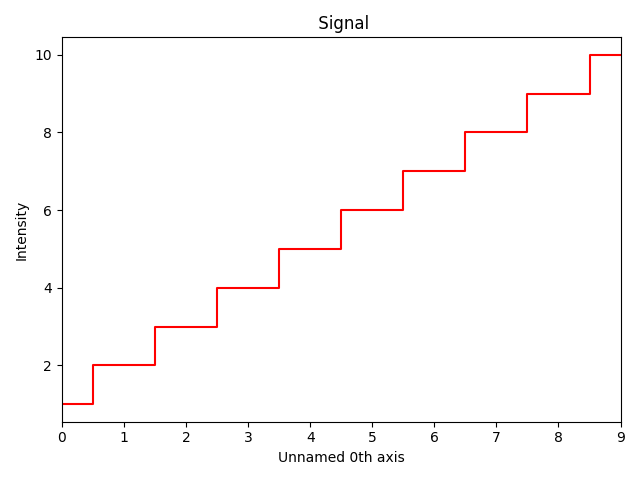

In [12]:
ten_points.plot()

## 4. Loading data from  a file

More typically we load data from files using the `hs.load` function. The following code loads the ``CL1.rpl`` file in the ``machine_learning`` folder and stores it in the `s` variable.

In [13]:
s = hs.load("data/CL1.hdf5")

Let's check what is inside the `s` variable

In [14]:
s

<EELSSpectrum, title: , dimensions: (64, 64|1024)>

HyperSpy has loaded the data into an `EELSSpectrum` object that we have stored in the `s` variable. The symbol | separates the navigation dimensions `x`, `y` and the signal dimensions, in this case `energy loss`.


The metadata read from the file is stored in the ``original_metadata`` attribute.

In [16]:
s.original_metadata

├── beam-energy = 100.0
├── byte-order = dont-care
├── collection-angle = 10.0
├── convergence-angle = 7.0
├── data-length = 8
├── data-type = float
├── depth = 1024
├── depth-name = EnergyLoss
├── depth-origin = 100.0
├── depth-scale = 0.5
├── depth-units = eV
├── ev-per-chan = 1.0
├── height = 64
├── height-name = Y
├── height-origin = 0.0
├── height-scale = 1.0
├── height-units = cm
├── key = value
├── offset = 0
├── record-by = vector
├── signal = EELS
├── width = 64
├── width-name = X
├── width-origin = 0.0
├── width-scale = 1.0
└── width-units = cm

Part of this information is also available in the ``metadata`` attribute. HyperSpy only uses internally the information in ``metadata``.

In [17]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 7.0
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

The metadata can be easily modified:

In [18]:
s.metadata.Acquisition_instrument.TEM.convergence_angle = 10

In [19]:
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 10
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

### 4.1 Loading *proprietary* data

Many data readers have been written for experimental tools, with various support for reading and writing:
<br/><br/>

<center><img src="img/formats.png" width=800px></center>

A few are illustrated here:

#### Gatan DigitalMicrograph image

In [20]:
im = hs.load('data/HRSTEM.dm3')
print(im)

<Signal2D, title: 03_5Mx_scale_corrected, dimensions: (|512, 512)>


In [21]:
im.original_metadata

├── ApplicationBounds = (0, 0, 984, 1920)
├── DocumentObjectList
│   └── TagGroup0
│       ├── AnnotationGroupList
│       │   └── TagGroup0
│       │       ├── AnnotationType = 31
│       │       ├── BackgroundColor = (0, 0, 0)
│       │       ├── BackgroundMode = 2
│       │       ├── FillMode = 2
│       │       ├── Font
│       │       │   ├── Attributes = 0
│       │       │   ├── FamilyName = Microsoft Sans Serif
│       │       │   └── Size = 7
│       │       ├── ForegroundColor = (-1, -1, -1)
│       │       ├── HasBackground = 0
│       │       ├── IsMoveable = 1
│       │       ├── IsResizable = 1
│       │       ├── IsSelectable = 1
│       │       ├── IsTranslatable = 1
│       │       ├── IsVisible = 1
│       │       ├── ObjectTags
│       │       ├── Rectangle = (482.0, 16.0, 496.0, 142.0)
│       │       ├── TextOffsetH = 1.0
│       │       ├── TextOffsetV = 1.0
│       │       ├── TextWidth = 35.0
│       │       └── UniqueID = 19
│       ├── AnnotationType = 20
│   

#### EDAX EDS Maps

The EDS map is quite large when uncompressed, so we distributed it compressed to save bandwidth, and extract it first. This is generally not a needed step when you are trying to open data you collected yourself.

In [22]:
from zipfile import ZipFile
with ZipFile("data/EDAX_EDS_files.zip") as z:
    z.extractall('data/')

Loading the EDS map includes the spatial and energy axis calibrations: 

In [23]:
eds_map = hs.load('data/SEM_EDS_map.spd')

# Print the string representation of the EDS Signal and display its `axes_manager`
print(eds_map)
eds_map.axes_manager

<EDSSEMSpectrum, title: EDS Spectrum Image, dimensions: (256, 231|2000)>


<Axes manager, axes: (256, 231|2000)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |    256 |      0 |       0 |   0.024 |     µm 
               y |    231 |      0 |       0 |   0.023 |     µm 
---------------- | ------ | ------ | ------- | ------- | ------ 
          Energy |   2000 |        |       0 |   0.005 |    keV

The loaded metadata retains the important EDS parameters, as well as elemental information:

In [24]:
eds_map.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 36.5
│       │       ├── elevation_angle = 30.5
│       │       ├── energy_resolution_MnKa = 126.69678
│       │       └── live_time = 260.1984
│       ├── Stage
│       │   └── tilt_alpha = 0.0
│       └── beam_energy = 5.0
├── General
│   ├── original_filename = SEM_EDS_map.spd
│   └── title = EDS Spectrum Image
├── Sample
│   └── elements = ['Al', 'C', 'Fe', 'N', 'Na', 'O', 'Si']
└── Signal
    ├── binned = True
    └── signal_type = EDS_SEM

If you want to save disk space, run the following cell to delete the files that were extracted from the `.zip` file above (about 225 MB, total):

In [25]:
import os
for f in [f'data/{fn}' for fn in ['Live Map 1_Img.ipr', 'SEM_EDS_map.spc', 'SEM_EDS_map.spd']]:
    try:
        os.remove(f)
    except:
        print(f'{f} was not found')

### 4.2 Loading *generic* data

Because of the flexibility provided by the greater scientific Python ecosystem, almost any data can be used to create HyperSpy signals:

* A `Signal` can be created from any data that can be expressed as a `numpy` array
* If your tool can output raw data, it can be loaded into HyperSpy with little fuss
* Using general Python features, data from other sources can be loaded easily as well

#### Loading a spectrum saved as a `.csv` file

In [26]:
# Print the first few lines of the .csv file for inspection:
with open('data/spectrum.csv', 'r') as f:
    for i in range(5):
        print(f.readline(), end='')

# Energy (eV), Counts
9.000000134110450745e+01,1.090600000000000000e+04
9.020000134408473969e+01,1.090400000000000000e+04
9.040000134706497192e+01,1.069800000000000000e+04
9.060000135004520416e+01,1.044400000000000000e+04


In [27]:
# Load the data into a numpy array from the .csv file:
d = np.loadtxt("data/spectrum.csv", delimiter=',')
print(d)

[[   90.00000134 10906.        ]
 [   90.20000134 10904.        ]
 [   90.40000135 10698.        ]
 ...
 [  497.60000741   507.        ]
 [  497.80000742   559.        ]
 [  498.00000742   552.        ]]


In [28]:
# Create a signal from the second column of data (the spectral counts)
s = hs.signals.Signal1D(d[:,1])
print(s)

<Signal1D, title: , dimensions: (|2041)>


In [29]:
# Take the first column of values and set the energy axis accordingly:
energy_data = d[:,0]
s.axes_manager[0].scale = np.diff(energy_data).mean()
s.axes_manager[0].units = 'eV'
s.axes_manager[0].offset = energy_data[0]
s.axes_manager[0].name = 'Energy'
s.axes_manager

Signal axis name,size,offset,scale,units
Energy,2041,90.00000134110451,0.20000000298023224,eV


<IPython.core.display.Javascript object>


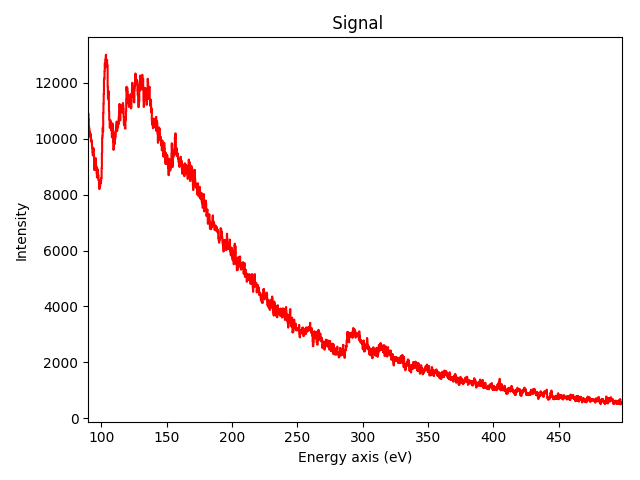

In [30]:
s.plot()

#### Loading data saved in a Matlab `.mat` file

While not built into HyperSpy itself, the `scipy` library provides tools for accessing data stored within Matlab files, which allows you to create HyperSpy signals from such data

In [31]:
from scipy.io import loadmat, savemat
house = loadmat('data/house_image.mat')
print(house['__header__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Sep 11 14:27:46 2017'


We create a `Signal2D` (since the data is an image), and while the data gets loaded, there's no metadata information or axes calibration because the file contains only the data values:

In [32]:
s = hs.signals.Signal2D(house['IMin0'])
print(s.metadata)
s.axes_manager

├── General
│   └── title = 
└── Signal
    ├── binned = False
    └── signal_type = 



Signal axis name,size,offset,scale,units
,256,0.0,1.0,
,256,0.0,1.0,


<IPython.core.display.Javascript object>


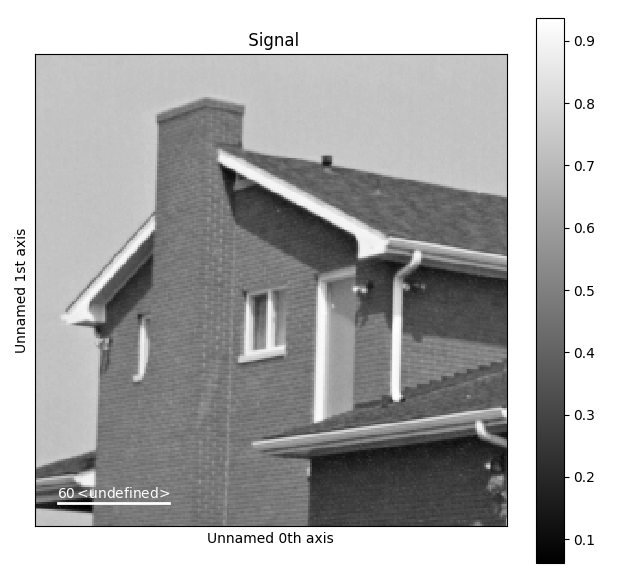

In [33]:
s.plot()

## 5. Axis properties

The axes are stored in the `axes_manager` attribute, and there is a distinction between *Navigation* axes and *Signal* axes. You can have any number of either type of axis, but most signals will have either zero, one, or two of both:

#### Examples of signal dimensionality 
<br/>
<center>
<table class="table table-condensed table-nonfluid tablesorter tablesorter-default" role="grid">
<tbody aria-live="polite" aria-relevant="all">
<tr role="row">
<td></td>
<td><strong># of Navigation Axes</strong></td>
<td><strong># of Signal Axes</strong></td>
</tr>
<tr role="row">
<td>Single spectrum</td>
<td>0</td>
<td>1</td>
</tr>
<tr role="row">
<td>Line scan spectrum image</td>
<td>1</td>
<td>1</td>
</tr>
<tr role="row">
<td>Areal spectrum image</td>
<td>2</td>
<td>1</td>
</tr>
<tr role="row">
<td>Single image</td>
<td>0</td>
<td>2</td>
</tr>
<tr role="row">
<td>Time series image stack</td>
<td>1</td>
<td>2</td>
</tr>
<tr role="row">
<td>4D STEM diffraction image</td>
<td>2</td>
<td>2</td>
</tr>
</tbody>
</table>
</center>

To display information about the axes (such as calibration, name, units, etc.), simply refer to the attribute by name and the notebook will return a nicely formatted HTML response:

In [34]:
s = hs.load("data/CL1.hdf5")

In [35]:
s.axes_manager

<Axes manager, axes: (64, 64|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               X |     64 |      0 |       0 |       1 |     cm 
               Y |     64 |      0 |       0 |       1 |     cm 
---------------- | ------ | ------ | ------- | ------- | ------ 
      EnergyLoss |   1024 |        |   1e+02 |     0.5 |     eV

The `AxesManager` can be indexed by position:

In [36]:
s.axes_manager[0]

<X axis, size: 64, index: 0>

In [37]:
s.axes_manager[1]

<Y axis, size: 64, index: 0>

In [38]:
s.axes_manager[2]

<EnergyLoss axis, size: 1024>

It is also possible to access the axes by name:

In [39]:
s.axes_manager["EnergyLoss"]

<EnergyLoss axis, size: 1024>

The axes have `offset`, `scale`, `units` and `name` attributes

In [40]:
for val in [s.axes_manager["EnergyLoss"].name, 
            s.axes_manager["EnergyLoss"].scale, 
            s.axes_manager["EnergyLoss"].units, 
            s.axes_manager["EnergyLoss"].size, 
            s.axes_manager["EnergyLoss"].offset]:
    print(val)

EnergyLoss
0.5
eV
1024
100.0


Signals can be sliced by pixel or calibrated units on the both types of axes:

In [41]:
# Signal axes:

# Slice by axis units with floats:
print(s.isig[200.0:276.2])

# Slice by index with integers:
print(s.isig[20:100])

# Navigation axes:
print(s.inav[20.0:63.0, 5.2:26.7])  # by calibrated units
print(s.inav[20:40, 50:])           # by pixel indices

<EELSSpectrum, title: , dimensions: (64, 64|152)>
<EELSSpectrum, title: , dimensions: (64, 64|80)>
<EELSSpectrum, title: , dimensions: (43, 22|1024)>
<EELSSpectrum, title: , dimensions: (20, 14|1024)>


## 6. Visualization

The `plot()` method is the primary one used to perform data visualization, and can be called on any signal

#### Moving around 

You can move the "spectrum picker" on the navigator plot by:

* Using the keyboard arrow keys
* Using the mouse pointer

#### Other useful shortcuts

* Add an additional "spectrum picker": `e`
* Increase/decrease the picker size: `+` or `-`

<IPython.core.display.Javascript object>


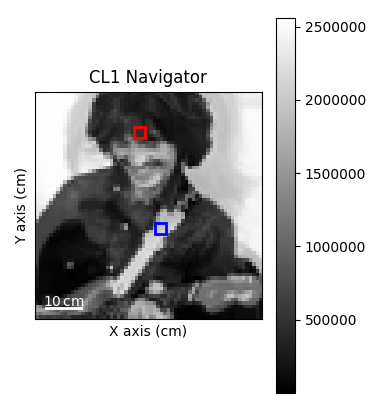

<IPython.core.display.Javascript object>


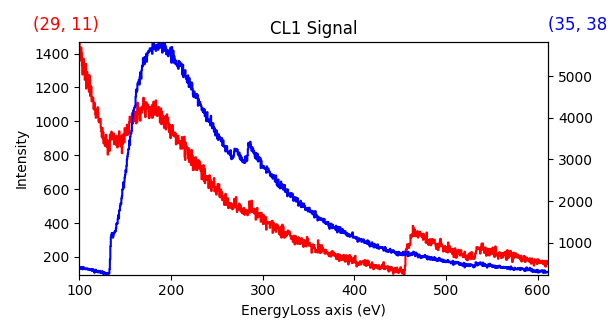

In [42]:
s.plot()

## 7. Swapping navigation and signal spaces

We can change the way in  which Hyperspy "sees" the data by converting the ``EELSSpectrum`` into a ``Signal2D`` object. This will change the signal from a 1-D "spectrum-first" representation to a 2-D "image-first" one (the underlying data remains this same).

In [54]:
im = s.to_signal2D()

The ``im`` variable now contains a ``Signal2D`` object that shares the data with the ``EELSSpectrum`` object in ``s``.

In [55]:
im

<Signal2D, title: , dimensions: (1024|64, 64)>

In [56]:
im.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       └── collection_angle = 10.0
│       ├── beam_energy = 100.0
│       └── convergence_angle = 7.0
├── General
│   ├── original_filename = CL1.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── signal_origin = 
    └── signal_type = EELS

Now we can visualize the same data in the "energy filtered" way

<IPython.core.display.Javascript object>


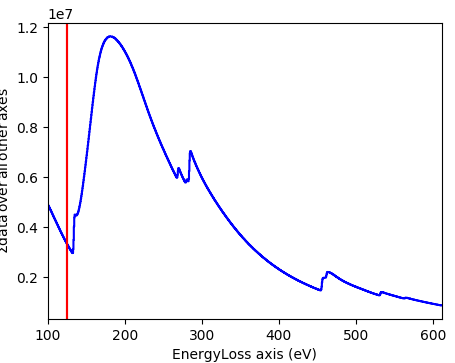

<IPython.core.display.Javascript object>


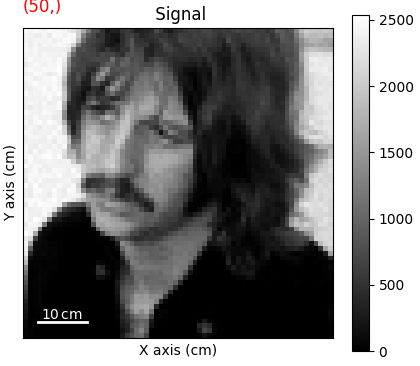

In [45]:
im.plot()

## 8. Saving data to files

All `Signal` objects have a method named `save()` that will write the signal data, together with its metadata to disk. The default file extension is `.hspy`, which is an [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) file with a [specific format](http://hyperspy.org/hyperspy-doc/current/user_guide/io.html#hspy-format). This format is an open standard, meaning software packages other than HyperSpy should be able to open it (such as Matlab, R, etc.). Only the default format is guaranteed to save all possible metadata, and have no data loss in round-trip save/load cycle.

Without a file extension given, the default `.hspy` will be used:

In [46]:
im.save('CL1_as_image', overwrite=True)

In [49]:
# Use a Jupyter command to list the contents of the current directory:
%ls -lah

total 12M
drwxr-xr-x  5 jat jat  4.0K May  9 18:48  ./
drwxr-xr-x 10 jat jat  4.0K May  9 15:09  ../
-rw-r--r--  1 jat jat 1008K May  9 18:47 '01 - Getting Started.ipynb'
-rw-r--r--  1 jat jat  1.1M May  9 14:04 '02 - Curve fitting.ipynb'
-rw-r--r--  1 jat jat  1.6M May  8 02:00 '03 - TEM_EDS_nanoparticles.ipynb'
-rw-r--r--  1 jat jat  1.2M May  9 14:39 '04 - EELS_analysis.ipynb'
-rw-r--r--  1 jat jat  1.1M May  9 15:00 '05 - TomoTools.ipynb'
-rw-r--r--  1 jat jat  5.9M May  9 18:48  CL1_as_image.hspy
drwxr-xr-x  3 jat jat  4.0K May  9 18:41  data/
drwxr-xr-x  2 jat jat  4.0K May  8 02:00  img/
drwxr-xr-x  2 jat jat  4.0K May  9 15:00  .ipynb_checkpoints/


Besides the HyperSpy format, other file formats are supported to various degrees ([this list](http://hyperspy.org/hyperspy-doc/current/user_guide/io.html#supported-formats) has the details). To save to another format you must specify the extension. For example, the following line will save a 3D Tiff image (which will not contain the metadata): 

In [57]:
im.save('CL1_as_image.tif', overwrite=True)

We can load it to verify that we do get back what we saved

In [58]:
im = hs.load('CL1_as_image.tif')

<IPython.core.display.Javascript object>


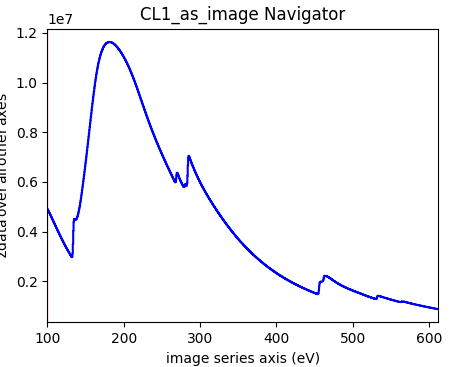

<IPython.core.display.Javascript object>


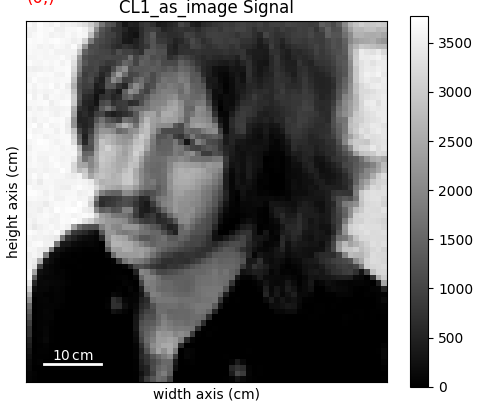

In [59]:
im.plot()

If you compare this result to the previous plot carefully, you'll see the scale and axes values/units for all the  axes were retained, but the axes names have changed from (`x`, `y`, `EnergyLoss`) to (`width`, `height`, `image series`). If we inspect the metadata, we'll also see that the EELS-specific information was lost. This is because of the limitations of the [tiff library](https://www.lfd.uci.edu/~gohlke/code/tifffile.py.html) used. 

In [53]:
im.metadata

├── General
│   ├── date = 2019-05-09
│   ├── original_filename = CL1_as_image.tif
│   ├── time = 18:50:41
│   └── title = 
└── Signal
    ├── binned = False
    └── signal_type = 

The moral of the story here: 

*Always save into HyperSpy's format if you can, since it maintains as much information as possible*

## 9. Working with `Signal`s and `Marker`s

HyperSpy signals can be indexed using the `isig` and `inav` attributes. Indexing is a very powerful feature. To go beyond the basic examples here have a look at the [User Guide](http://hyperspy.org/hyperspy-doc/current/user_guide/tools.html#indexing). This section also reviews the `Marker` functionality, which can be used to programmatically markup datasets as needed.

Firstly we'll load an RGB image of Eileen Collins, the first female Space Shuttle pilot and commander:

In [68]:
im = hs.load("data/astronaut.hdf5")

Notice that the navigation dimension is 3 because there is one axis per colour channel.

In [69]:
im

<Signal2D, title: , dimensions: (3|512, 512)>

We can plot the three channels using an often-used helper method from HyperSpy, `plot_images()`:

<IPython.core.display.Javascript object>


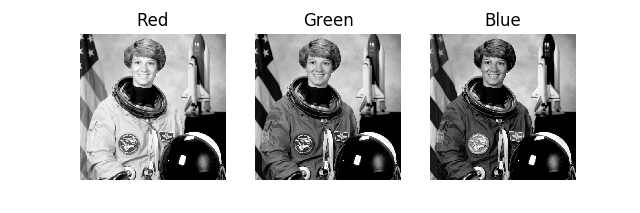

In [70]:
_ = hs.plot.plot_images(im, axes_decor="off", colorbar=False, label=["Red", "Green", "Blue"])

Like any signal, we can index the navigation axes using `inav`. For example, to obtain just the image in the first channel (Red):

<IPython.core.display.Javascript object>


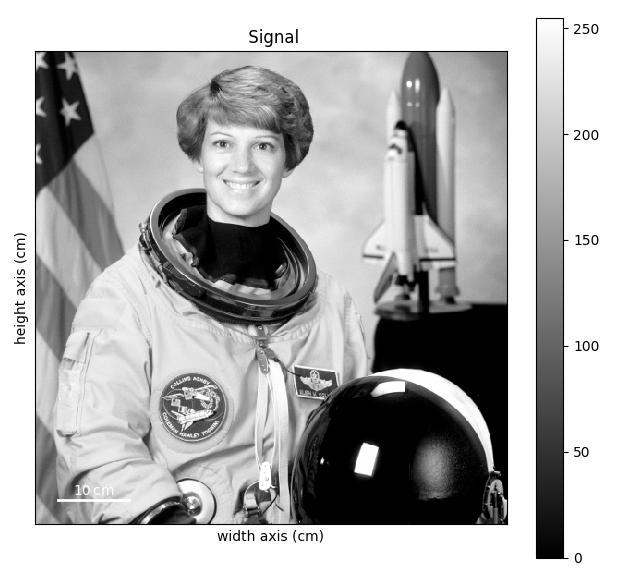

In [71]:
im.inav[0].plot()

And to get the last two channels, we can use the `inav` slicer to take from index 1 to the end of the axis, expressed as `inav[1:]` in typical Python syntax:

<IPython.core.display.Javascript object>


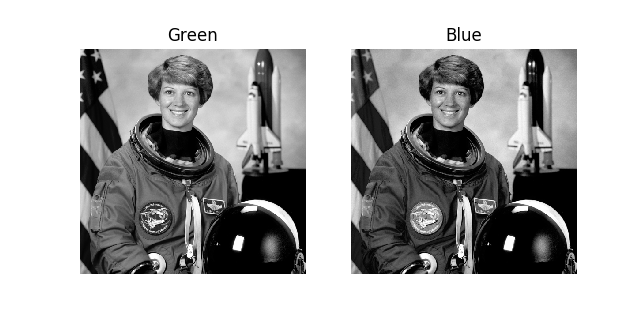

In [73]:
_ = hs.plot.plot_images(im.inav[1:], axes_decor="off", label=['Green', 'Blue'], colorbar=False)

Like for all Python iterable types, negative indices are interpreted as counting from the end, so the following is identical to the last cell and is an alternative syntax to obtain the last two channels:

<IPython.core.display.Javascript object>


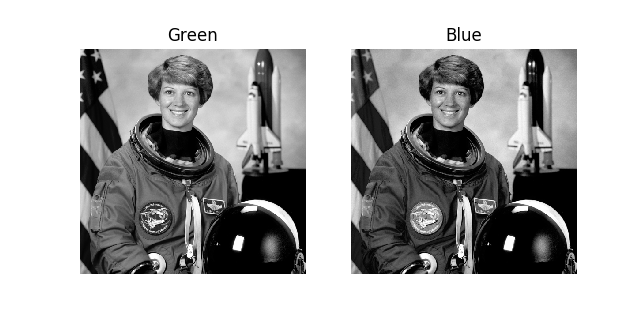

In [74]:
_ = hs.plot.plot_images(im.inav[-2:], axes_decor="off", label=['Green', 'Blue'], colorbar=False)

Similarly, we can use `isig` to index the signal axes, which for this signal represents the `X` and `Y` dimensions. Since the (0, 0) location is in the top left of the image, this example extracts the center horizontal range from index 128 to 384 (which is 128 pixels from the right edge) and the top-half vertical range from the top edge (index 0) to 256 (which is 256 pixels from the bottom edge). We also specify a `'single'` colorbar, which plots all three images on one global scale, and prints a colorbar to the right of the figure to provide quantitative scale:

<IPython.core.display.Javascript object>


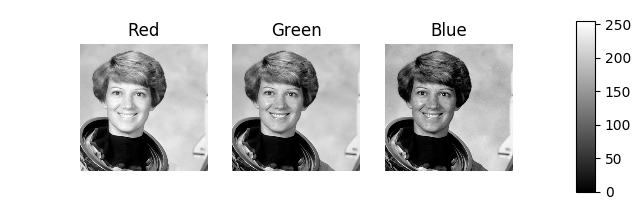

In [80]:
_ = hs.plot.plot_images(im.isig[128:-128, :-256], 
                        axes_decor="off", 
                        label=['Red', 'Green', 'Blue'],
                        colorbar='single')

We can use the `cmap` parameter to give each channel a different colormap (or just provide one value to make them all have the same) and the `'multi'` option for `colorbar` to print one colorbar scale for each image. The colormap options recognized are those recognized by [`matplotlib`](https://matplotlib.org/tutorials/colors/colormaps.html).

<IPython.core.display.Javascript object>


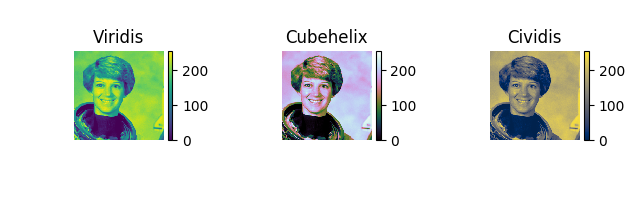

<IPython.core.display.Javascript object>


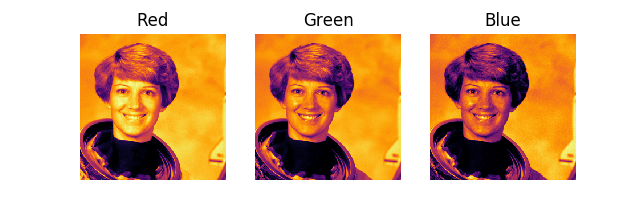

In [98]:
_ = hs.plot.plot_images(im.isig[128:-128, :-256], 
                        axes_decor="off", 
                        label=['Viridis', 'Cubehelix', 'Cividis'],
                        colorbar='multi',
                        cmap=['viridis', 'cubehelix', 'cividis'])
plt.tight_layout()   # Necessary because the colorbars sometimes overlap depending on figure size/resolution

_ = hs.plot.plot_images(im.isig[128:-128, :-256], 
                        axes_decor="off", 
                        label=['Red', 'Green', 'Blue'],
                        colorbar=False,
                        cmap='inferno')

Like most other methods, `isig` and `inav` can be chained as many times as necessary. *e.g.*:

<IPython.core.display.Javascript object>


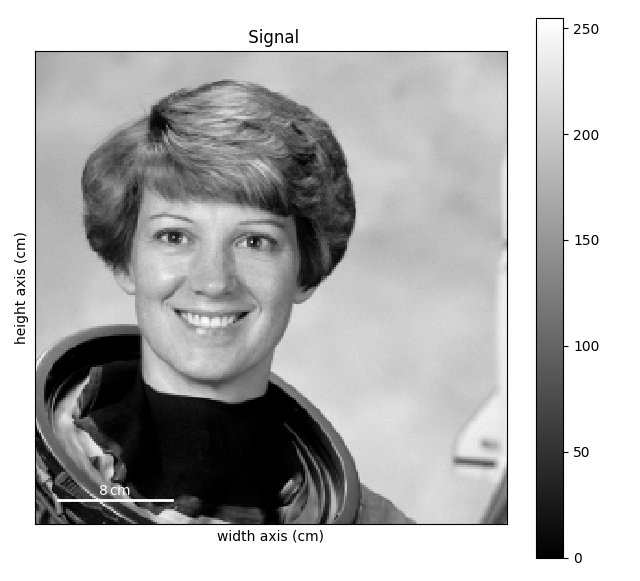

In [99]:
im.inav[1].isig[128:-128, :-256].plot()

This image is calibrated in centimetres, and the centre of the coordinate system is located between the astronaut's eyes. We can use the calibrated axes to add a marker at this location with the `add_marker` command:

<IPython.core.display.Javascript object>


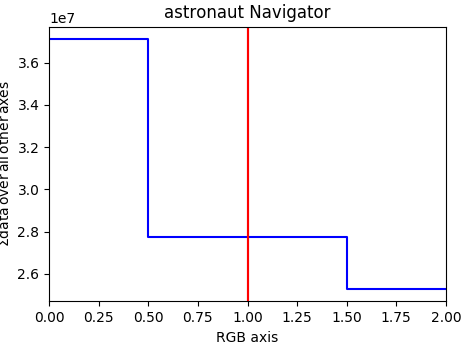

<IPython.core.display.Javascript object>


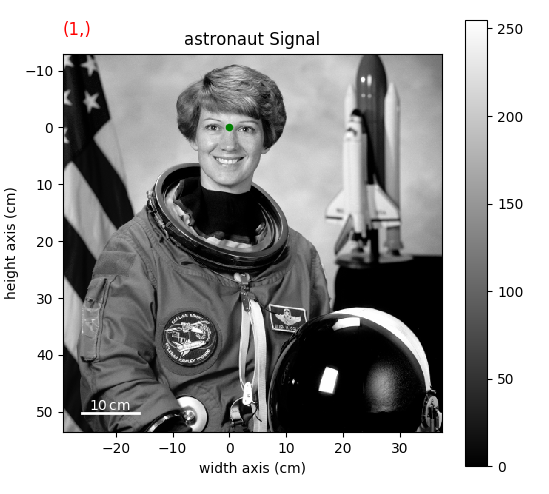

In [104]:
im.plot(axes_ticks=True)
im.add_marker(hs.plot.markers.point(0, 0, color='green'))

As described previously, HyperSpy signals allow indexing using float numbers to index using the axes calibration instead of data index. For example, to extract a 10 cm by 4 cm range around the eye region, you could use the folllowing:

<IPython.core.display.Javascript object>


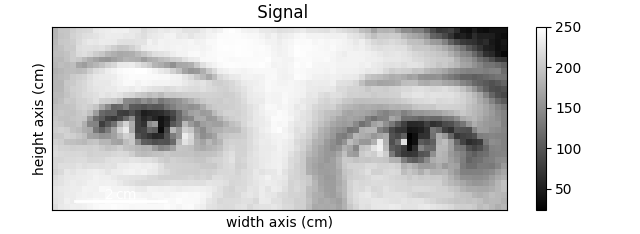

In [106]:
im.inav[0].isig[-5.:5., -2.:2.].plot()

## 10. Processing data with external functions

The HyperSpy signals contain a number of methods that operate on their data. However, we often need to operate on the data using other functions either native to Python, or from another third-party library. HyperSpy provides the `map` method to make it easy to apply external functions to multi-dimensional datasets.

We will use the previous RGB image to show how to apply the `rotate` function from `scipy.ndimage` to an RGB image. We first import the `rotate` method and load the image:

In [117]:
from scipy.ndimage import rotate
im = hs.load("data/astronaut.hdf5")
im

<Signal2D, title: , dimensions: (3|512, 512)>

Notice that as before, the image navigation size is 3 because the navigation axis corresponds to the 3 color channels, Red, Green and Blue.

`rotate` can operate on multidimensional images, but the rotation angle must be the same for all images. With HyperSpy we can easily specify the rotation angle for each image by creating a signal of the same navigation dimensions as `im` containing the rotation angle:

In [118]:
angles = hs.signals.BaseSignal([-15, 0, 15])
angles

<BaseSignal, title: , dimensions: (|3)>

`angles` has the right length (3), but we need to swap the signal and navigation axes so the navigation axis size matches that of `im`. We can do this using the `transpose` method:

In [119]:
angles.transpose()

<BaseSignal, title: , dimensions: (3|)>

When no arguments are passed to transpose (as in this case) we can use the `T` shortcut instead, a syntax borrowed from `numpy`:

In [120]:
angles.T

<BaseSignal, title: , dimensions: (3|)>

The following cell uses the map function to rotate each color channel by a different angle using SciPy's rotate function:

In [121]:
im.map(rotate,
       angle=angles.T,
       reshape=False,)

We can then plot the results, showing the use of [$\LaTeX$](https://en.wikipedia.org/wiki/LaTeX) syntax to add mathematical characters to the labels (a feature of `matplotlib`):

<IPython.core.display.Javascript object>


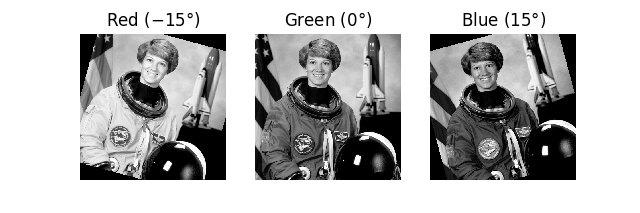

In [122]:
_ = hs.plot.plot_images(im, 
                        label=["Red ($-15\degree$)", "Green ($0\degree$)", "Blue ($15\degree$)"], 
                        axes_decor="off", colorbar=False)

To display the result in colour, we need to change the data type to `rgb8`. We can do that for the original image as well and compare using the `plot_images` command:

<IPython.core.display.Javascript object>


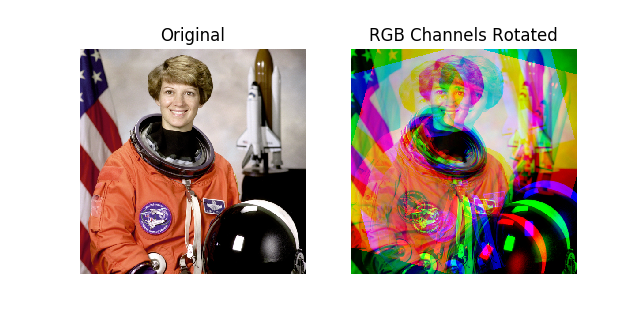

In [126]:
im_rgb_rot = im.to_signal1D()
im_rgb_rot.change_dtype("rgb8")

im_orig = hs.load('data/astronaut.hdf5')
im_rgb = im_orig.to_signal1D()
im_rgb.change_dtype("rgb8")

_ = hs.plot.plot_images([im_rgb, im_rgb_rot],
                        label=['Original', 'RGB Channels Rotated'],
                        axes_decor='off',
                        colorbar=None)

Notice that now there are no navigation axes becuase we merged them into one with the `change_dtype("rgb8")` method:

In [128]:
im_rgb

<Signal2D, title: , dimensions: (|512, 512)>

## I. Appendix

#### Creating the astronaut file for indexing example

In [129]:
import hyperspy.api as hs
from skimage.data import astronaut
s = hs.signals.Signal1D(astronaut())

# Calibrate the image
s.axes_manager[0].name = "width"
s.axes_manager[0].scale = 0.13
s.axes_manager[0].offset = -29.2
s.axes_manager[0].units = "cm"

s.axes_manager[1].name = "height"
s.axes_manager[1].scale = 0.13
s.axes_manager[1].offset = -12.9
s.axes_manager[1].units = "cm"

s.axes_manager[2].name = "RGB"
s.to_signal2D().save("data/astronaut.hdf5")

Overwrite 'data/astronaut.hdf5' (y/n)?
n
